<a href="https://colab.research.google.com/github/drshahizan/EDA/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML in Cybersecurity: Tutorial I

Contents in this tutorial
  1. Jupyter
  1. Python
  1. Numpy
  1. Pandas
  1. Matplotlib

The content in this notebook is a compilation of many amazing existing tutorials. References below:
  - http://cs231n.github.io/python-numpy-tutorial/   ($\leftarrow$ Justin Johnson's tutorial; Python/Numpy content adapted from here)
  - https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb (Exhaustive version of this tutorial)
  - https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html
  - https://www.dataquest.io/blog/jupyter-notebook-tutorial/
  - https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#machine-learning-statistics-and-probability
  - https://pandas.pydata.org/pandas-docs/stable/10min.html
  

Course web-page: https://cms.cispa.saarland/mlcysec/

Author: [Tribhuvanesh Orekondy](http://people.mpi-inf.mpg.de/~orekondy)   
Contact: orekondy@mpi-inf.mpg.de

### Header

This is a block that will probably remain common in all your notebooks. It imports the necessary packages and provides some additional conveniences. For instance, `%matplotlib inline` allows plotting graphs within the notebook and `%autoreload` allows you to install packages and use them immediately (without having to restart the notebook kernel).

In [ ]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2 

___

# Jupyter

Two main ingredients in a notebook are:
  1. **cells**: A container for code or text (e.g., this is written within a markdown cell)
  1. **kernels**: The "computational engine" which executes code blocks of the notebook

### Cells

Cells can contain either **code** or **markdown**

Check out keyboard shortcuts via `Cmd/Ctrl + Shift + P`.

Few important ones:
 * `Shift + Enter`: Executes the current cell and moves to the next
 * `Esc`: Enter vim-like command mode. Allows you to navigate cells via up/down arrow keys.
 * `Tab`: Autocompletes
 * `Shift + Tab`: Brings up documentation. Try this after entering `np.ones(`

In [ ]:
def say_hello():
    print('This is a code cell')

say_hello()

This is a code cell



or it can be a **markdown** cell, like this one.

If you're unfamiliar with Markdown syntax, check our this [cheat sheet](https://www.markdownguide.org/cheat-sheet).

Some things you can do with Markdown:

## This is a level 2 heading
### This is a level 3 heading

**Syntax**

This is some plain text that forms a paragraph.
Add emphasis via **bold** and __bold__, or *italic* and _italic_.

Paragraphs must be separated by an empty line.

**Lists**

* Sometimes we want to include lists.
 * Which can be indented.   


 1. Lists can also be numbered.
 2. For ordered lists.

[It is possible to include hyperlinks](https://www.example.com)

**Code blocks**

Inline code uses single backticks: `foo()`, and code blocks use triple backticks:

```
bar()
```

Or can be intented by 4 spaces:

    foo()

**Latex Code**

>$y=x^2$

>$e^{i/pi} + 1 = 0$

>$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

>$\frac{n!}{k!(n-k)!} = {n \choose k}$

>$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$

**Tables**

>```
First column name | Second column name
--- | ---
Row 1, Col 1 | Row 1, Col 2
Row 2, Col 1 | Row 2, Col 2
```

becomes:

>First column name | Second column name
>--- | ---
>Row 1, Col 1 | Row 1, Col 2
>Row 2, Col 1 | Row 2, Col 2

___

# Python

### Python Versions

There are two supported/popular versions of Python: 2.7 and 3.x. Note that Python 3.x is not backward-compatible (i.e., Python 2 code is incompatible with 3.x). For thhis course, we'll rely specifically on Python 3.7. 

Note that that Python 2.7 was once really popular. This will be deprecated in the near future. If you're using this (even elsewhere in your personal/work life) -- migrate!

### Basic Data Types

**Numbers**

In [ ]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


**Boolean**

In [ ]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


**Strings**

In [ ]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"
# Recommended printing style
hw12 = '{} {} {}'.format(hello, world, 12)
print(hw12)

s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

hello
5
hello world
hello world 12
hello world 12
Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


## Containers

Python extensively relies on four types of containers:
 1. Lists
 1. Dictionaries
 1. Sets
 1. Tuples

**Lists**  : resizable arrays, which can contain heteregenous elements

In [ ]:
xs = [3, 1, 2, 'foo']    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

# ----- Loops
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

[3, 1, 2, 'foo'] 2
foo
[3, 1, 'foo', 'foo']
[3, 1, 'foo', 'foo', 'bar']
bar [3, 1, 'foo', 'foo']
cat
dog
monkey


**Dictionaries**: Key-value pairs (similar to `Map`)

Also check-out `collections.defaultdict`, which is convenient at certain times.

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
print(d)
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d)
print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

cute
True
{'cat': 'cute', 'dog': 'furry'}
{'cat': 'cute', 'dog': 'furry', 'fish': 'wet'}
wet
N/A
wet
N/A


**Sets**: Unordered collection of elements

PS: Both dictionaries and sets use a `{...}` convention. Be cautious.

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


**Tuples**: Immutable lists

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "5"
print(d[(1, 2)])  # Prints "1"

<class 'tuple'>
5
1


### Functions

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


___

# Numpy

"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"
-https://docs.scipy.org/doc/numpy-1.10.1/user/whatisnumpy.html.

In [ ]:
import numpy as  np    # Almost everyone (at least the sane ones) import it this way

## Motivation

### Faster

In [ ]:
def matrixmult (A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
      print("Cannot multiply the two matrices. Incorrect dimensions.")
      return

    # Create the result matrix
    # Dimensions would be rows_A x cols_B
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [ ]:
A = np.random.random((10**2, 10**2))
B = np.random.random((10**2, 10**2))
print(A.shape, B.shape)

(100, 100) (100, 100)


In [ ]:
%%time
C = matrixmult(A, B)
print(np.sum(C))

250564.80507326918
CPU times: user 767 ms, sys: 1.26 ms, total: 768 ms
Wall time: 768 ms


In [ ]:
%%time
C = A.dot(B)    # Note: A*B performs element-wise multiplication
print(np.sum(C))

250564.80507326918
CPU times: user 447 µs, sys: 1.69 ms, total: 2.14 ms
Wall time: 1.21 ms


### Stronger

In [ ]:
a = np.array([
    [1, 2, 3, 1],
    [5, 7, 9, 10],
    [4, 6, 8, 2],
])

print(a.shape)
print(a[2, 2])
print(a[1:2, 2:3])
print(a[:-1])

(3, 4)
8
[[9]]
[[ 1  2  3  1]
 [ 5  7  9 10]]


Other ways of creating arrays

In [ ]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.50488863 0.65921167]
 [0.19178881 0.5312908 ]]


In [ ]:
print(e > 0.5)
print(e[e > 0.5])

[[ True  True]
 [False  True]]
[0.50488863 0.65921167 0.5312908 ]


**Numpy Operations**

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


# Pandas

"pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python." - [Pandas](http://pandas.pydata.org/pandas-docs/stable/)


"Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R." - [Why Pandas?](https://pandas.pydata.org/)

In [ ]:
import pandas as pd

Often you'll be dealing with $d$-dim datapoints, or $d$-features. A **dataframe** provides a nice way to encapsulate this data and represent it in a tabular structure.

In [ ]:
df = pd.DataFrame({ 'A' : [1., 2., 3., 4.],
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : ['foo', 'bar', 'foo', 'bar'] })
display(df)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,2.0,2013-01-02,1.0,3,train,bar
2,3.0,2013-01-02,1.0,3,test,foo
3,4.0,2013-01-02,1.0,3,train,bar


### Load some existing data

In [ ]:
! if [ ! -f iris.csv ]; then wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv; fi

--2022-12-08 15:59:36--  https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2022-12-08 15:59:36 (39.5 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
! head iris.csv

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [ ]:
iris = pd.read_csv('iris.csv')
print(type(iris))   # Iris is a dataframe
iris

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Viewing

In [ ]:
# Some exploratory functions
print('Head')
display(iris.head(n=5))   # Show just the first few rows

print('Tail')
display(iris.tail(n=3))

print('Random sample')
display(iris.sample(n=5))

display(iris.columns)

# Simple stats
display(iris.describe())

Head


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Tail


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Random sample


,sepal_length,sepal_width,petal_length,petal_width,species
21,5.1,3.7,1.5,0.4,setosa
42,4.4,3.2,1.3,0.2,setosa
78,6.0,2.9,4.5,1.5,versicolor
51,6.4,3.2,4.5,1.5,versicolor
43,5.0,3.5,1.6,0.6,setosa


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Selection

In [ ]:
# sample = iris.sample(n=5)

# # Select columns
# print('Selecting columns')
# display(sample[['sepal_length', 'species']])

# # Select rows
# print('Selecting rows')
# display(sample[:3])

print('Filter rows based on some criteria')
# Using a single filter
display(iris[iris['petal_length'] > 6.0])
# Multiple filters
display(iris[(iris['petal_length'] > 6.0) & (iris['petal_width'] < 2.0)])

Filter rows based on some criteria


,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica
130,7.4,2.8,6.1,1.9,virginica


### Operations

In [ ]:
display(iris.sample(n=5).apply(np.cumsum))   # Map function f to each row in sequence
display(iris.mean())

,sepal_length,sepal_width,petal_length,petal_width,species
121,5.6,2.8,4.9,2.0,virginica
83,11.6,5.5,10.0,3.6,virginicaversicolor
15,17.3,9.9,11.5,4.0,virginicaversicolorsetosa
0,22.4,13.4,12.9,4.2,virginicaversicolorsetosasetosa
144,29.1,16.7,18.6,6.7,virginicaversicolorsetosasetosavirginica


sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

# Matplotlib

"Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms." -[Matplotlib](https://matplotlib.org/index.html)

In [ ]:
import matplotlib.pyplot as plt

# To display plots inline, use this special Jupyter command
%matplotlib inline

### Barebones example

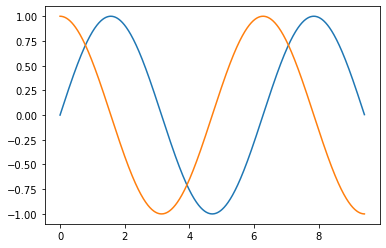

In [ ]:
t = np.arange(0, np.pi * 3, 0.01)
y1 = np.sin(t)
y2 = np.cos(t)

plt.plot(t, y1)
plt.plot(t, y2)
plt.show()

### Let's beautify this

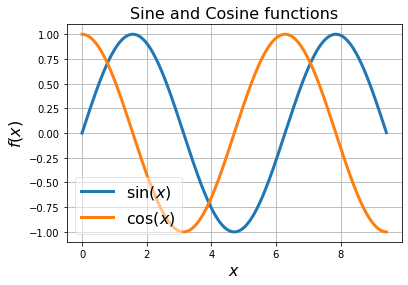

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)

# Plot them
ax.plot(t, y1, label='$\sin(x)$', linewidth=3.0)
ax.plot(t, y2, label='$\cos(x)$', linewidth=3.0)

# Set the title (shown above the plot)
ax.set_title('Sine and Cosine functions', fontsize=16)

# Mark axes
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$f(x)$', fontsize=16)

# Legend
ax.legend(loc='best', fancybox=True, framealpha=0.5, fontsize=16)

# Grid
ax.grid(True)

plt.show()

Another helpful library to clean-up your plots is [Seaborn](). This can be installed via `conda install seaborn` (make sure you've activated your environment before executing this command).

With this library installed, you can simply import it and set the style. The library will take plotting, setting the fontsizes, etc.

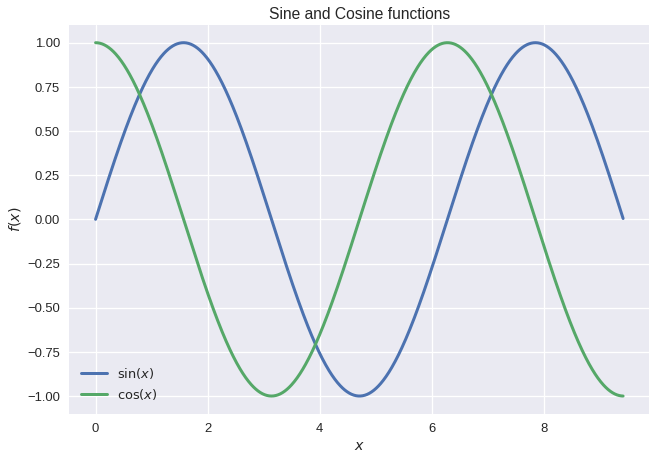

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")   # or "whitegrid"
sns.set_context("talk")     # or "paper", "notebook", "poster"

fig, ax = plt.subplots(nrows=1, ncols=1)

# Plot them
ax.plot(t, y1, label='$\sin(x)$', linewidth=3.0)
ax.plot(t, y2, label='$\cos(x)$', linewidth=3.0)

# Set the title (shown above the plot)
ax.set_title('Sine and Cosine functions')

# Mark axes
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

# Legend
ax.legend()

plt.show()

sns.reset_orig()   # Seaborn always overrides plotting styles. This "unsets" seaborn from doing it.

## Subplots

When you want to display multiple plots simultaneously

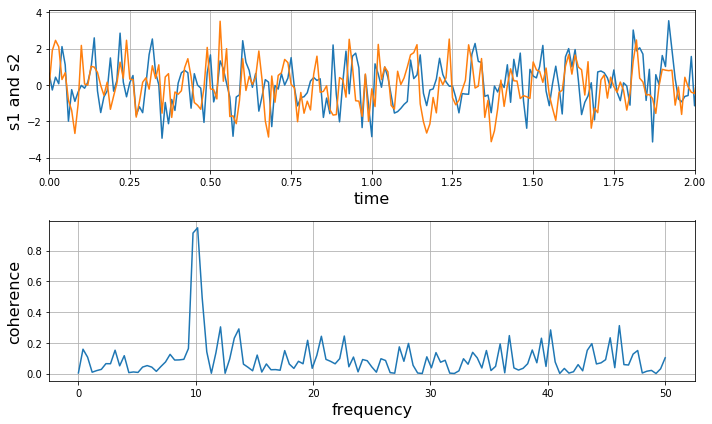

In [ ]:
dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, figsize=(10.0, 6.0))
# axs is an array. axs[0] = top-plot, axs[1] = bottom-plot

# plotting on top
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time', fontsize=16)
axs[0].set_ylabel('s1 and s2', fontsize=16)
axs[0].grid(True)

# plotting on bottom
cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_xlabel('frequency', fontsize=16)
axs[1].set_ylabel('coherence', fontsize=16)

fig.tight_layout()
plt.show()

## Scatter plots

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


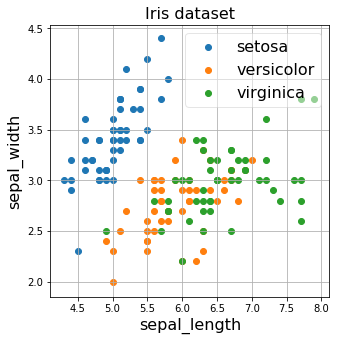

In [ ]:
x_label = 'sepal_length'
y_label = 'sepal_width'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.0, 5.0))

for spec in ['setosa', 'versicolor', 'virginica']:
    df = iris[iris['species'] == spec]
    ax.scatter(df[x_label], df[y_label], label=spec)

# Set the title (shown above the plot)
ax.set_title('Iris dataset', fontsize=16)

# Mark axes
ax.set_xlabel(x_label, fontsize=16)
ax.set_ylabel(y_label, fontsize=16)

# Legend
ax.legend(loc='best', fancybox=True, framealpha=0.5, fontsize=16)

# Grid
ax.grid()

plt.show()